<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-learning-Final-Project/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project : **  Steel Industry Energy Prediction

**NAME :**  Muhammed Sajid

**Organization:** Entri Elevate

**Date :** 10/04/2025

***Overview of Problem Statement:***

"Energy consumption in the steel industry is a critical factor affecting production costs and environmental impact. Efficient energy management is essential to minimize waste, reduce costs, and lower carbon emissions. However, predicting energy consumption accurately is challenging due to the influence of multiple factors such as production levels, machine efficiency, and operational parameters. Developing a reliable predictive model can help optimize energy usage and improve sustainability in the steel industry."

 ***Objective:***

To develop and evaluate various machine learning models for predicting Energy consumption, identify the best-performing model

***Data Description***

**Source:** https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('Steel_industry_data.csv')
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [ ]:
# Display basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

This function will show column names, dtypes

In [ ]:
# Summary statistics
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000




*   Provide Mean,Median,Min,Max and Percentile for numerical columns



In [ ]:
data.shape

(35040, 11)

**Dataset** : ***Steel Industry Energy Consumption***


*   The dataset Contains [35040] rows and [11] Columns.
*   It includes various features related to energy consumption in the steel
    industry
*   The goal is analyze and predict energy usage
*   Key Column: Usage_kwh





In [ ]:
data.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


Handling Missing Values

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y %H:%M", errors='coerce')

# Extract useful features from the datetime column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['day_of_week'] = data['date'].dt.dayofweek

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

# Drop the original 'date' column as we've extracted relevant features
df.drop(columns=['date'], inplace=True)

# Display the first few rows after preprocessing
df.head()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,year,month,day,...,day_of_week,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,2018,1,1,...,0,False,True,False,False,False,False,False,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,2018,1,1,...,0,False,True,False,False,False,False,False,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,2018,1,1,...,0,False,True,False,False,False,False,False,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,2018,1,1,...,0,False,True,False,False,False,False,False,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,2018,1,1,...,0,False,True,False,False,False,False,False,False,False


Text(0, 0.5, 'Frequency')

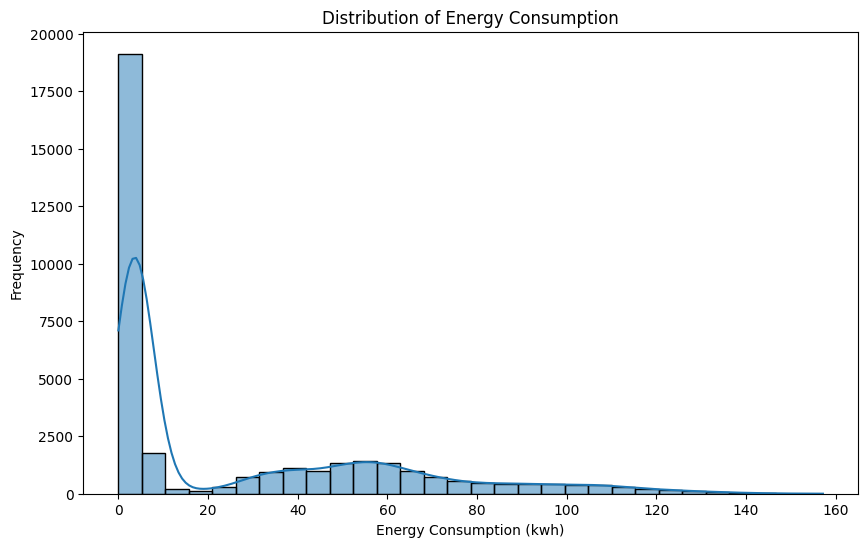

In [ ]:
# Check data distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kwh)')
plt.ylabel('Frequency')


**Analysis of Energy Consumption (Usage_kwh) of Distribution**


1.   Right-Skewed Distribution(Positive Skewed)

*   Most of the values are concentrated near 0-5 kwh






In [ ]:
numeric_columns = data.select_dtypes(include='number')

In [ ]:
numeric_columns

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,year,month,day,hour,minute,day_of_week
0,3.17,2.95,0.00,0.0,73.21,100.00,900,2018,1,1,0,15,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,2018,1,1,0,30,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,2018,1,1,0,45,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,2018,1,1,1,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,2018,12,31,23,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,2018,12,31,23,15,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,2018,12,31,23,30,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,2018,12,31,23,45,0


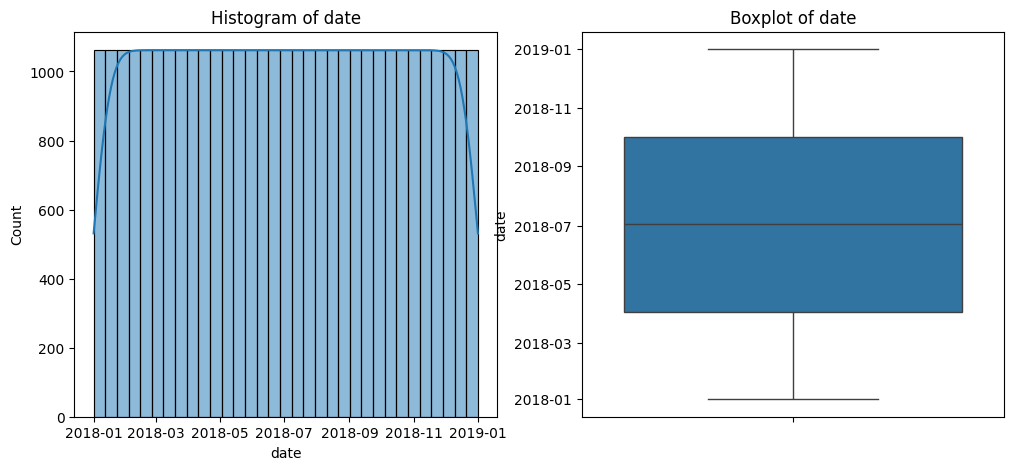

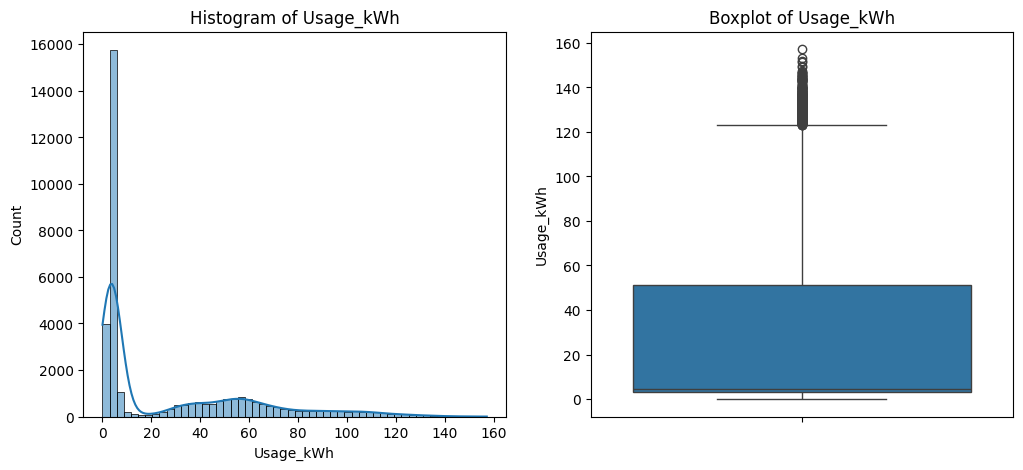

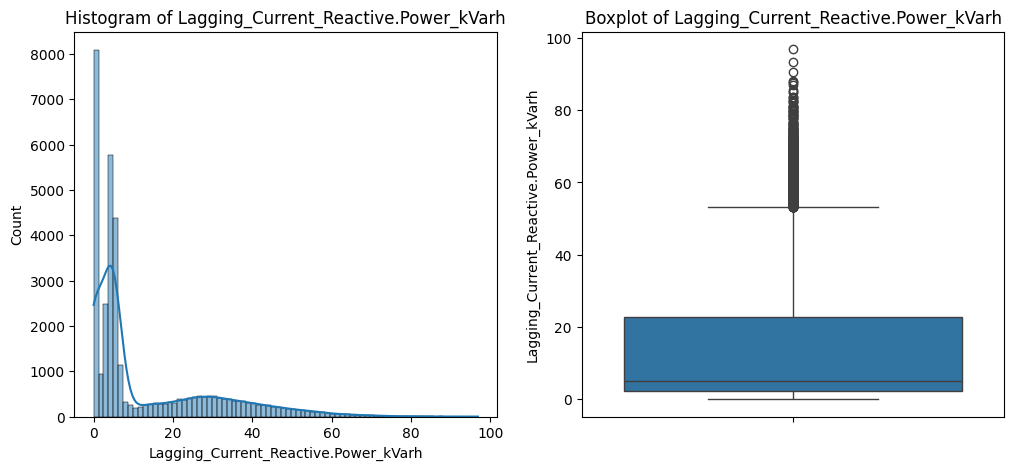

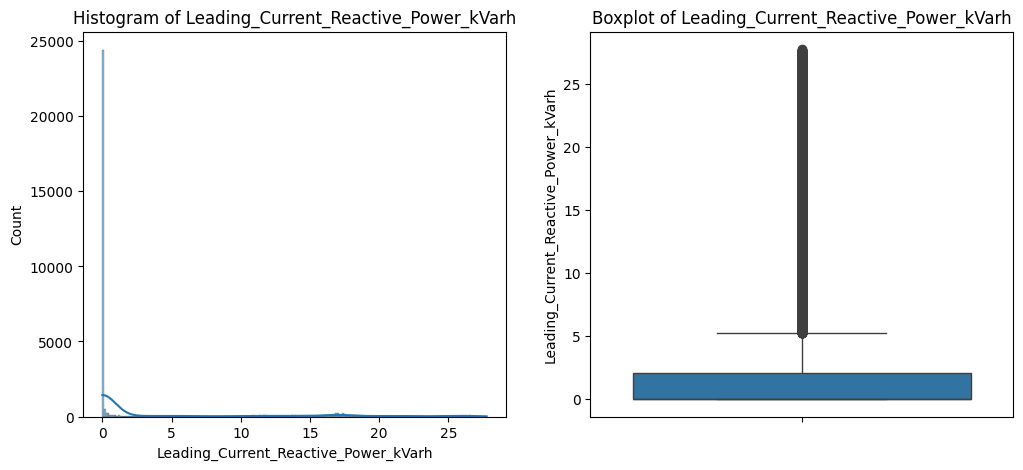

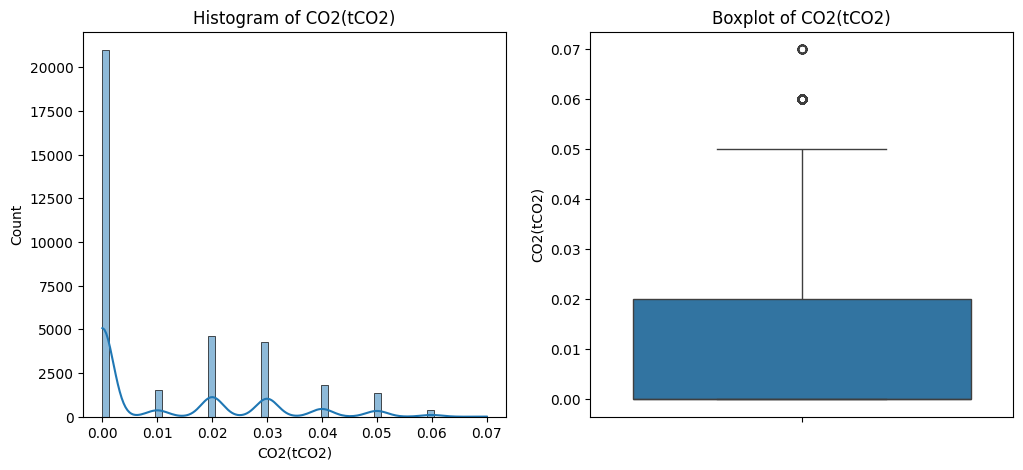

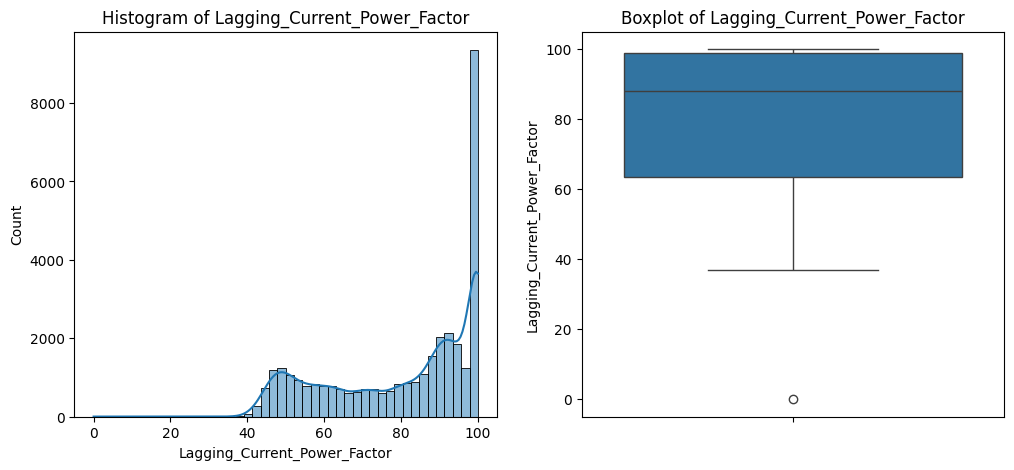

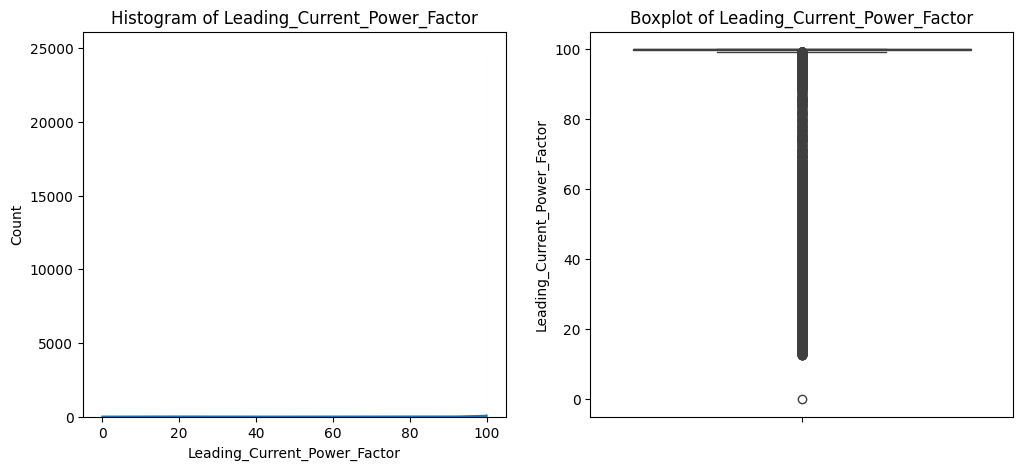

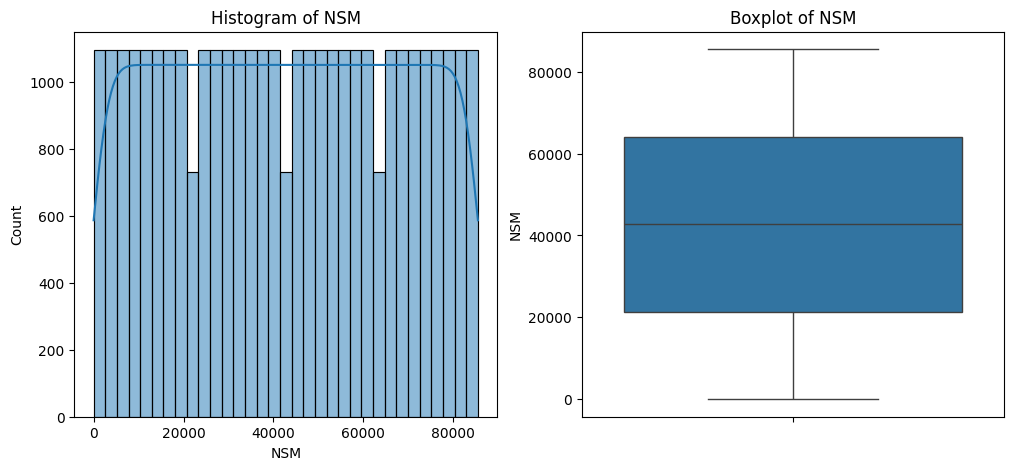

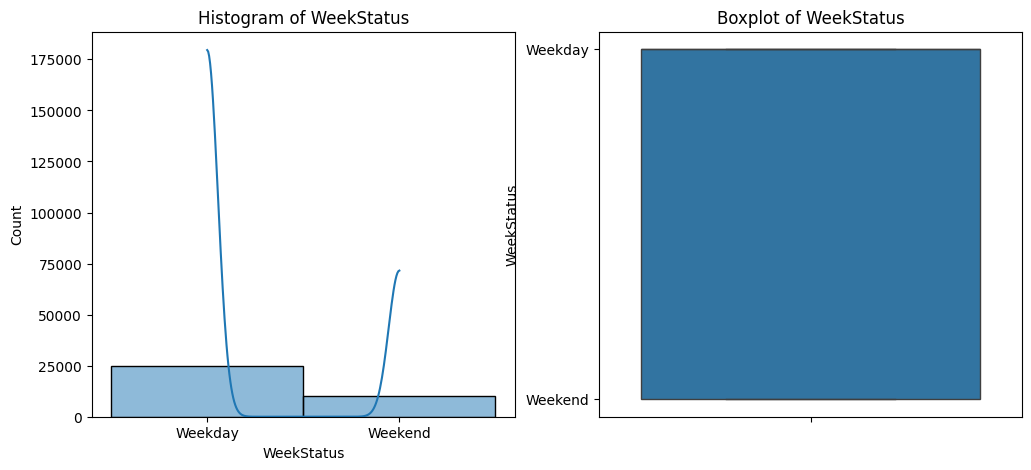

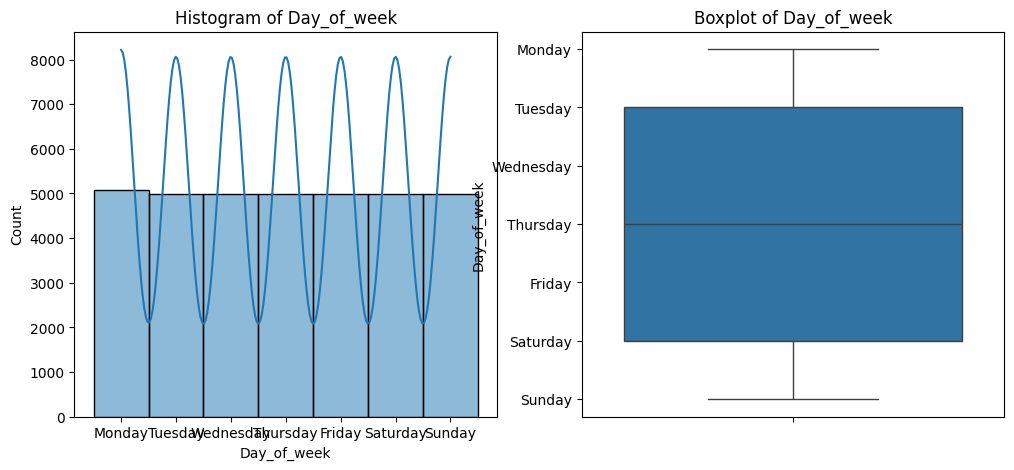

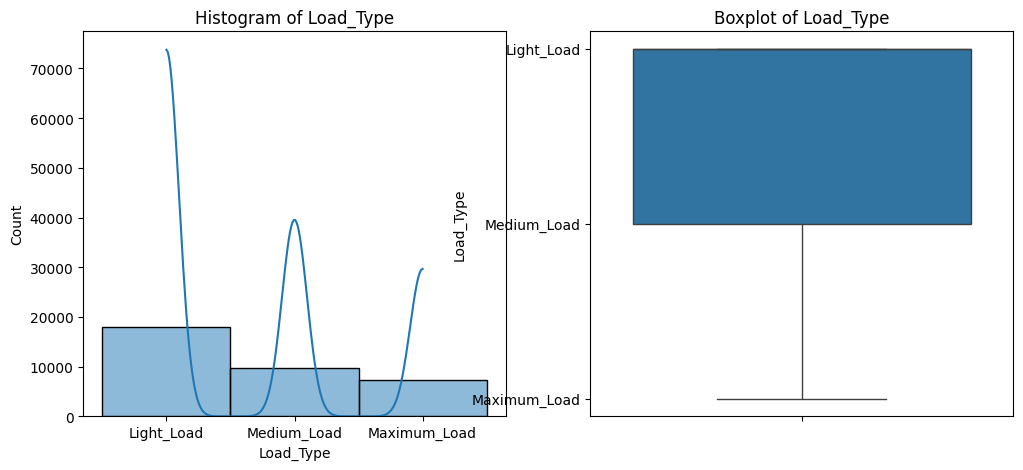

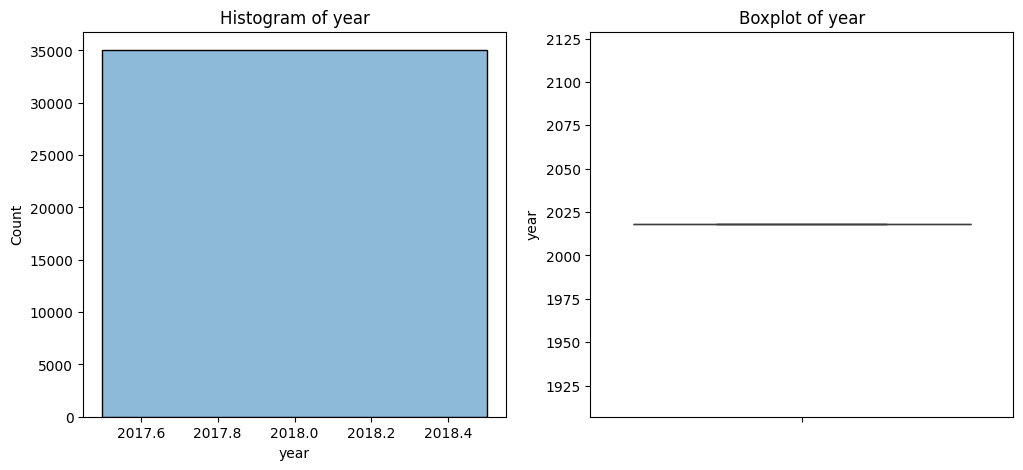

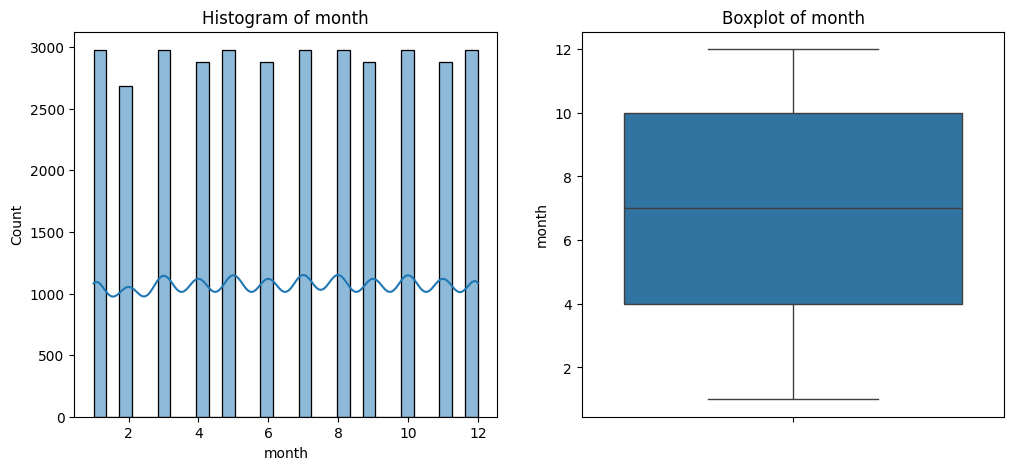

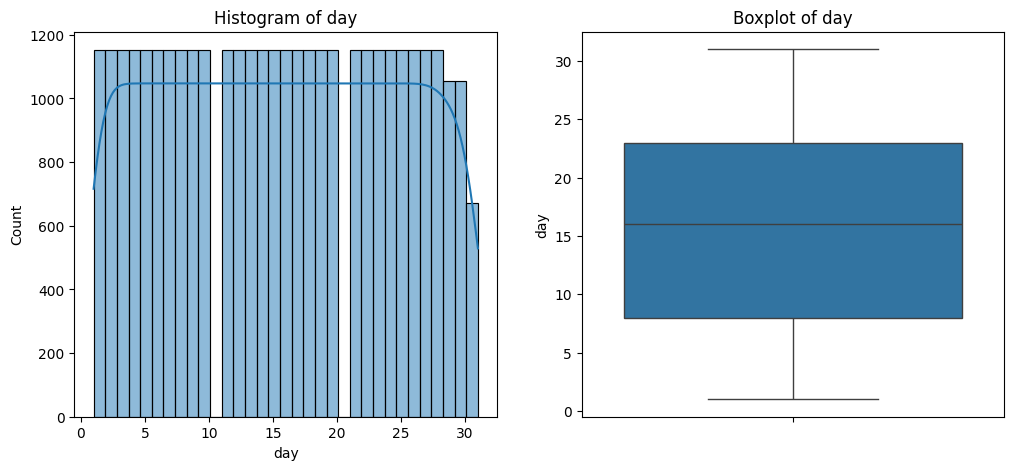

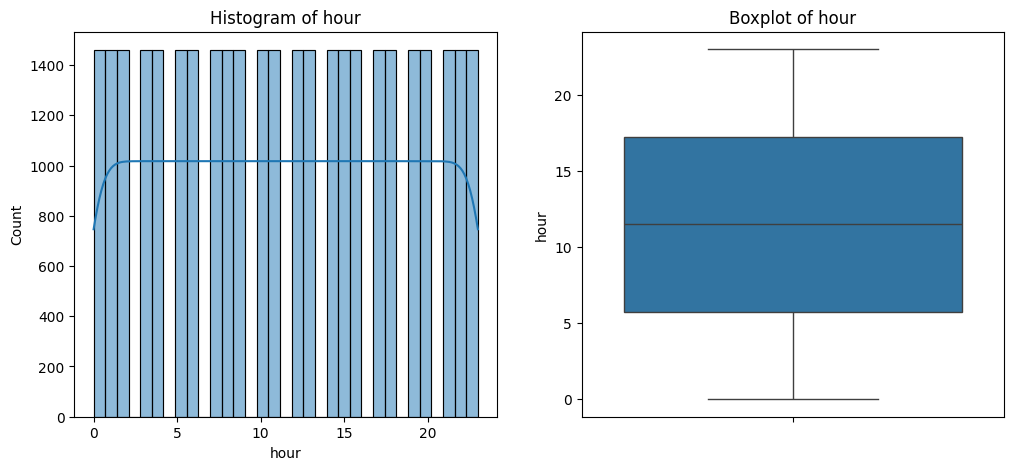

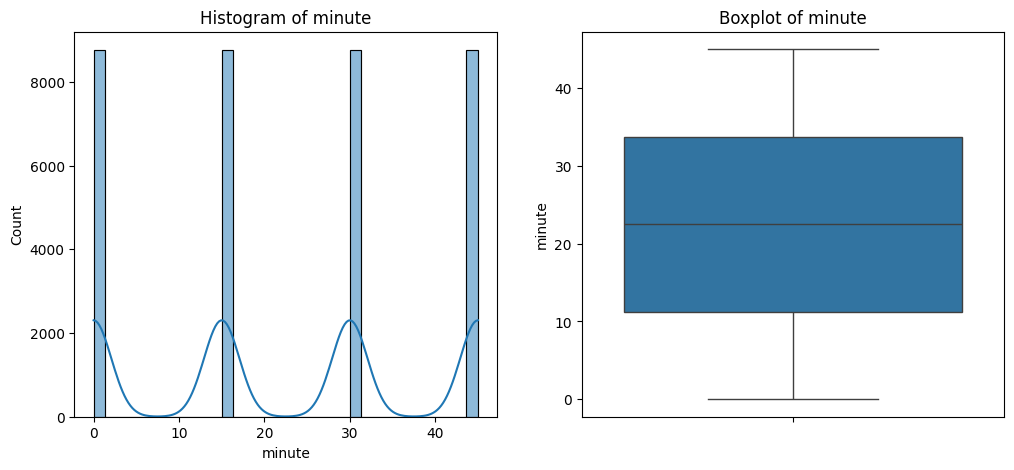

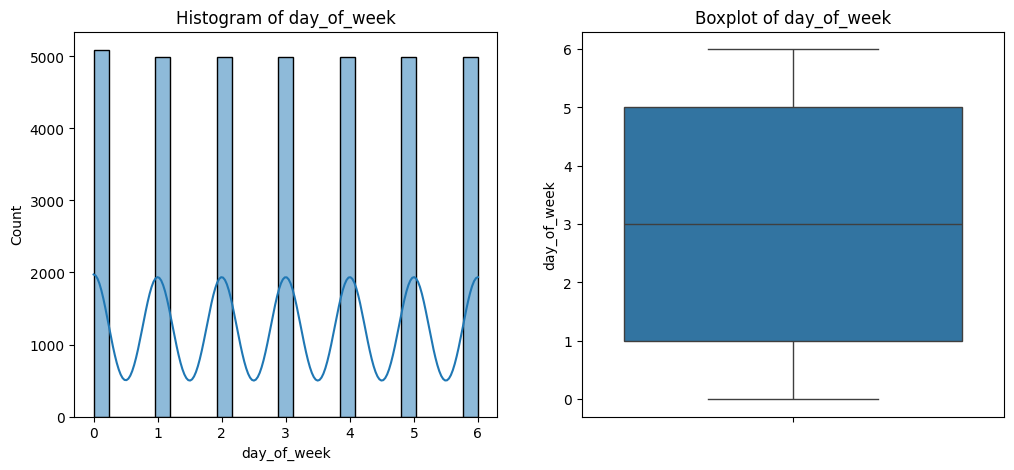

In [ ]:
for column in data:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    # Instead of filtering only the specified column, filter the entire DataFrame
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    # Apply the outlier removal function to the DataFrame, not just the column
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

print(cleaned_data.shape)

(23042, 17)


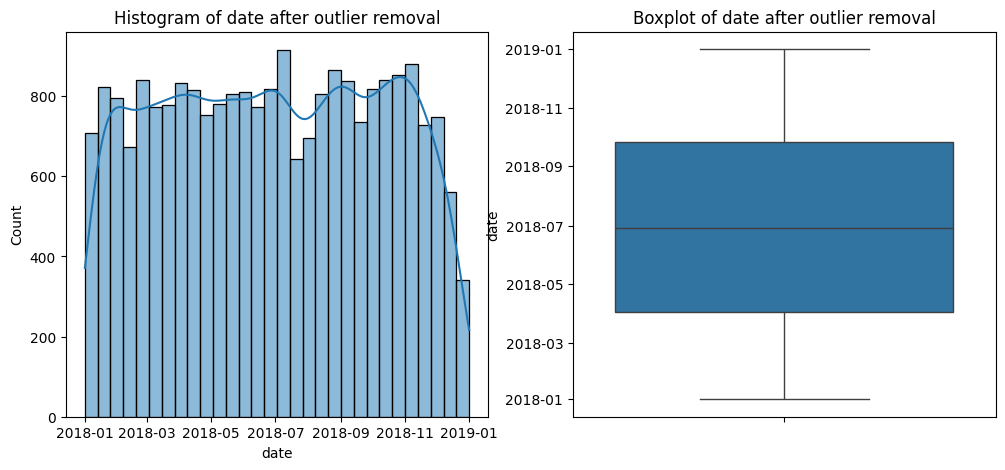

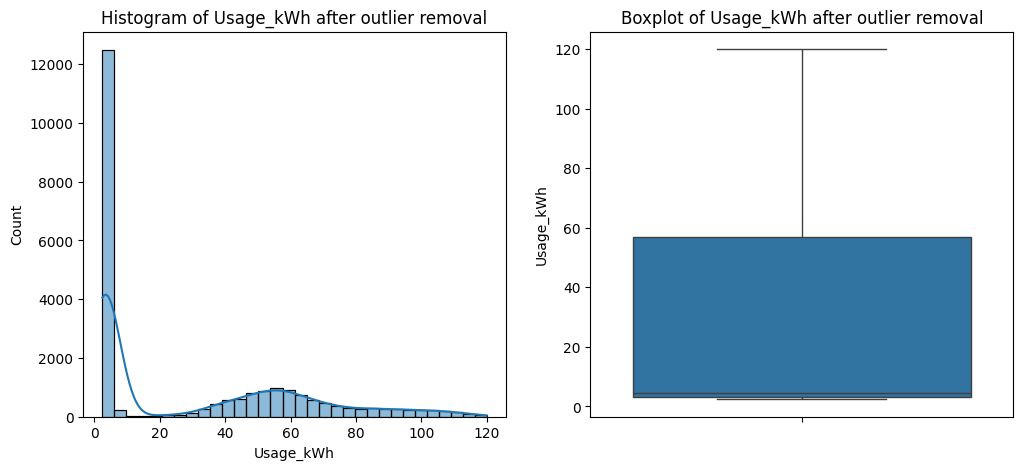

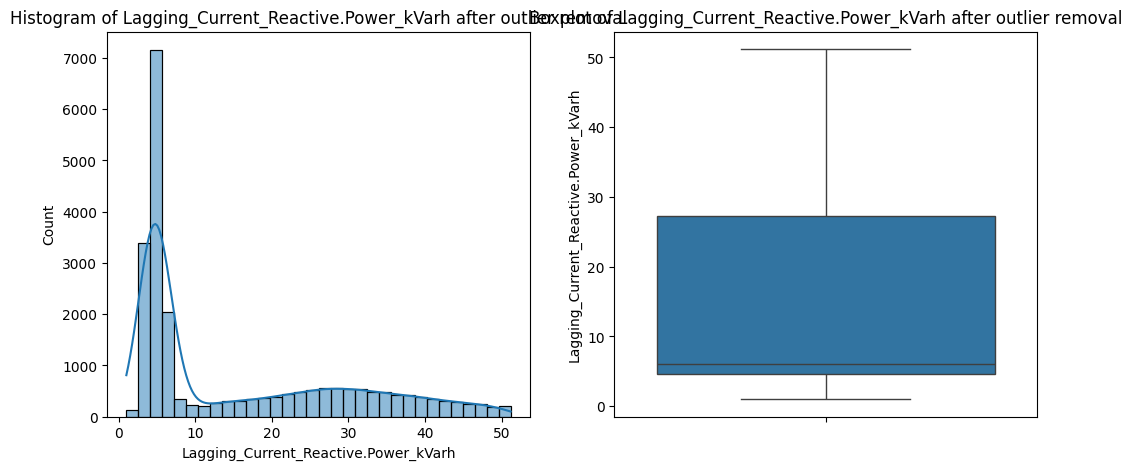

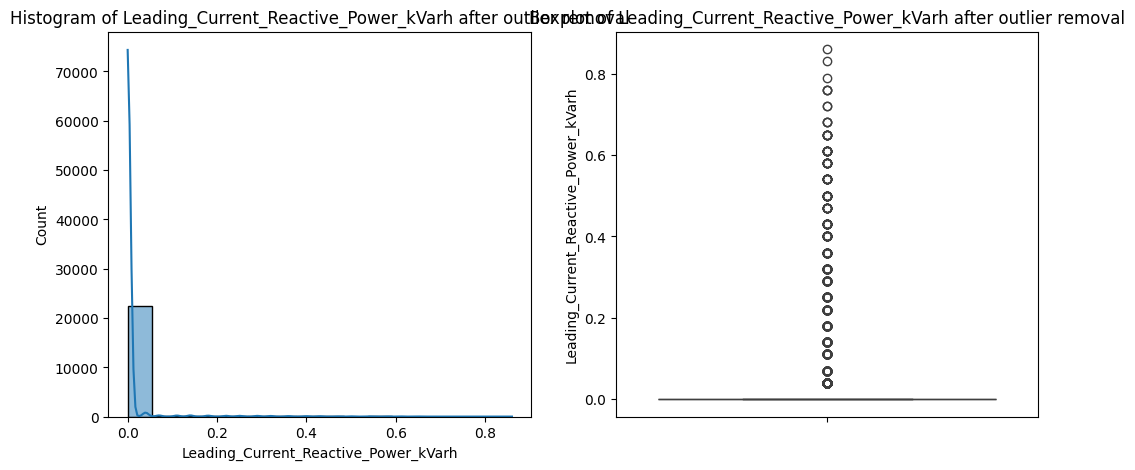

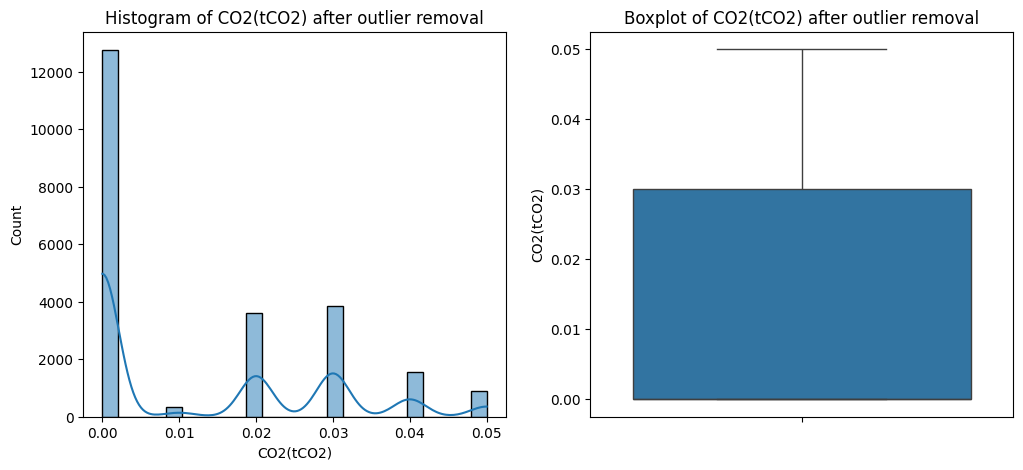

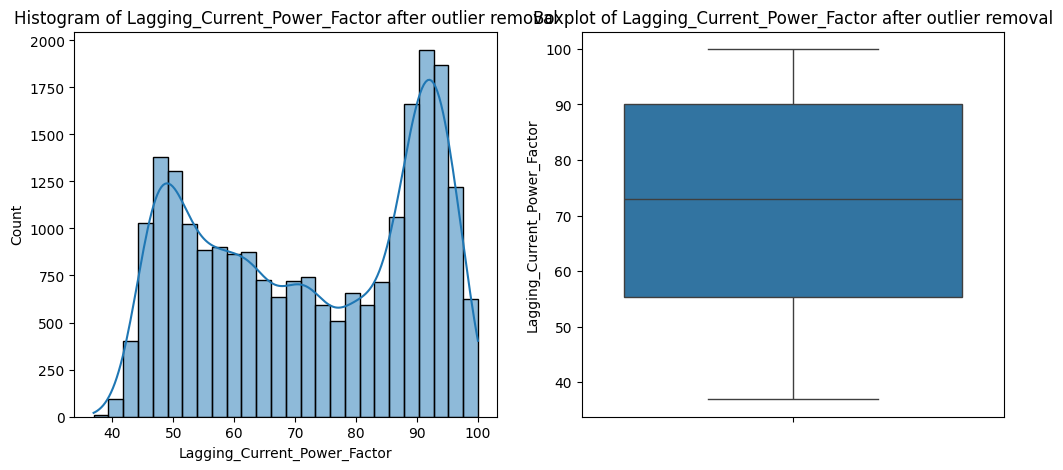

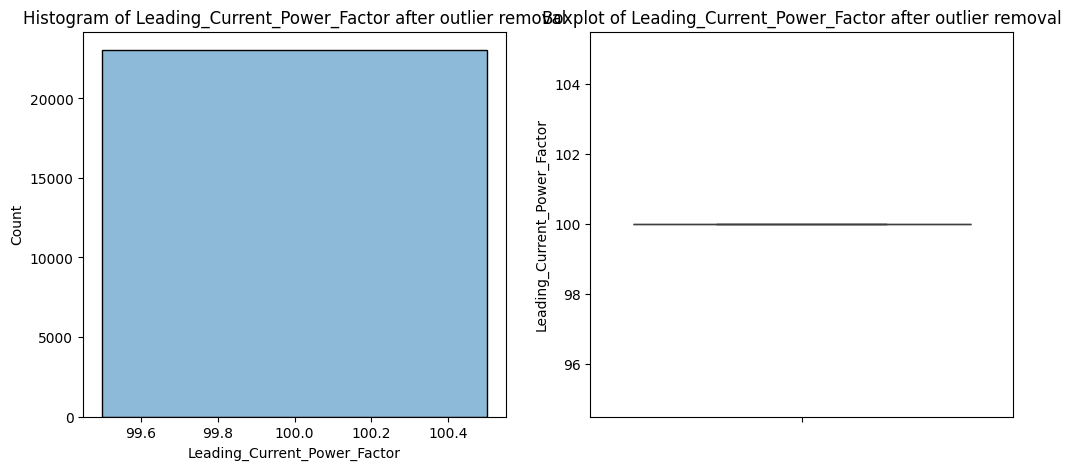

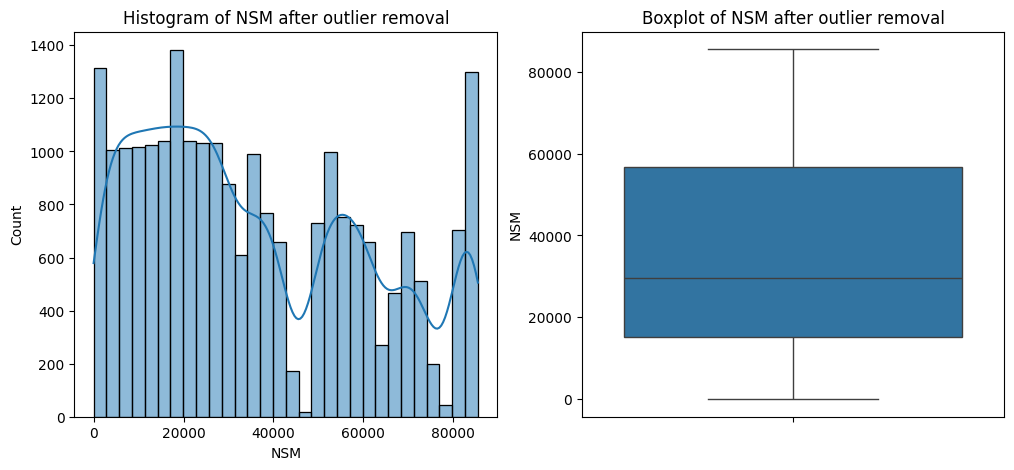

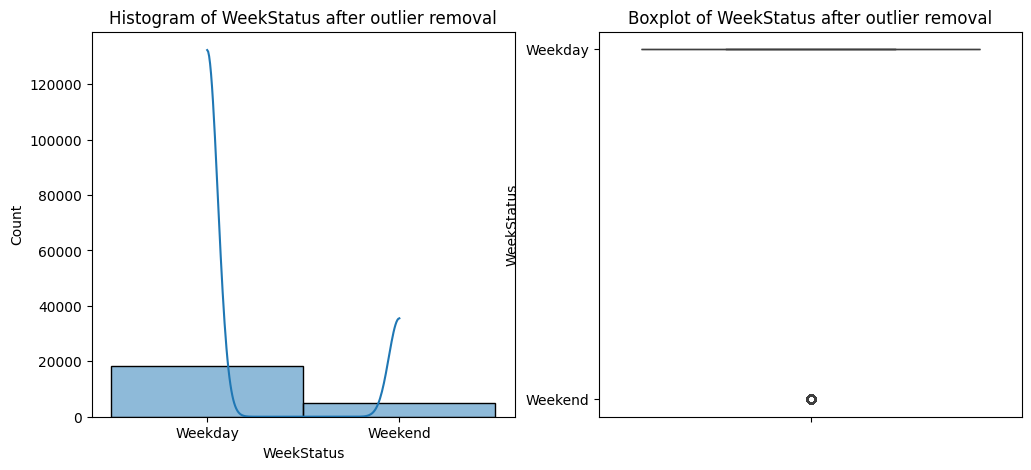

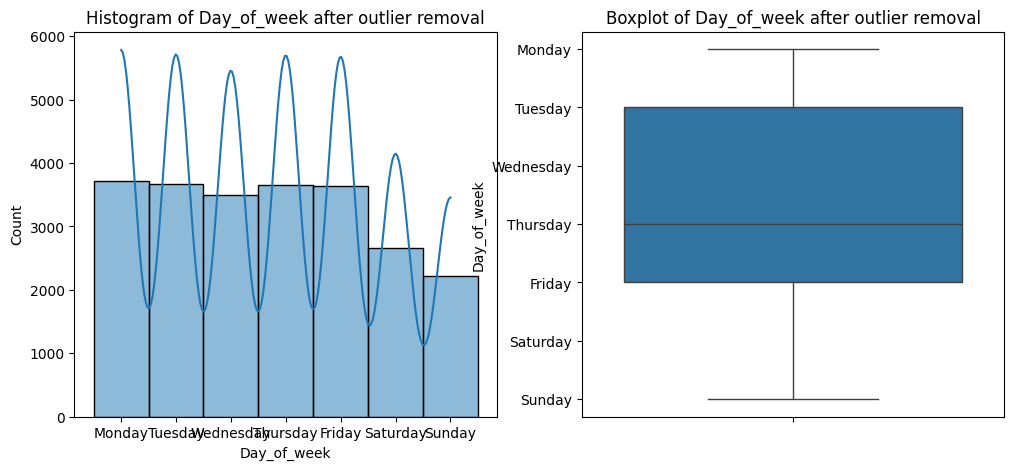

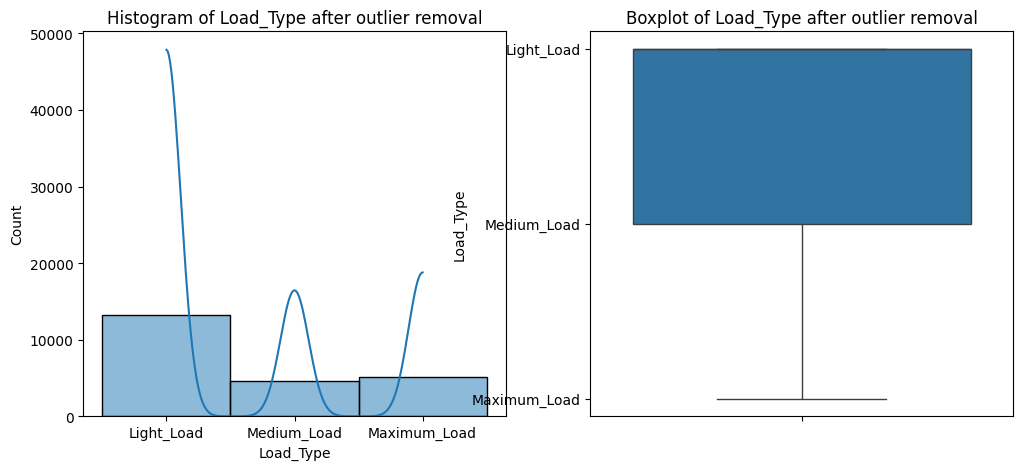

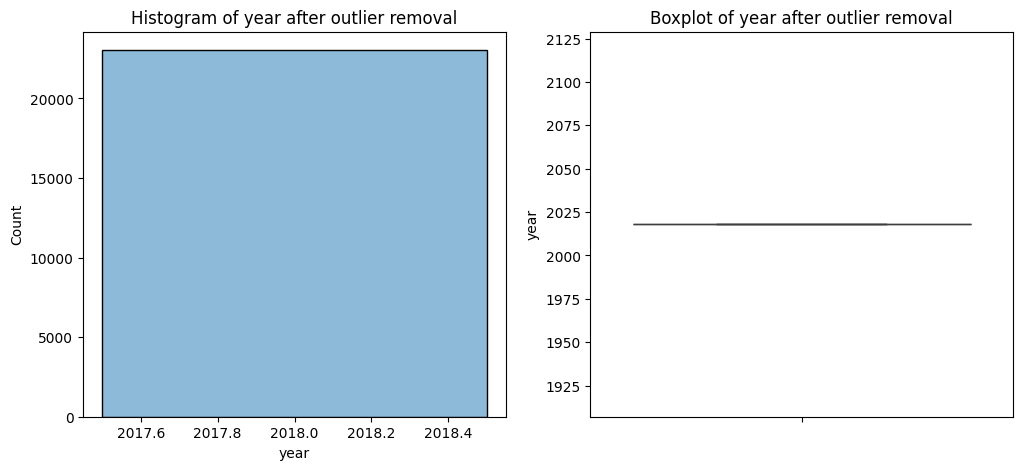

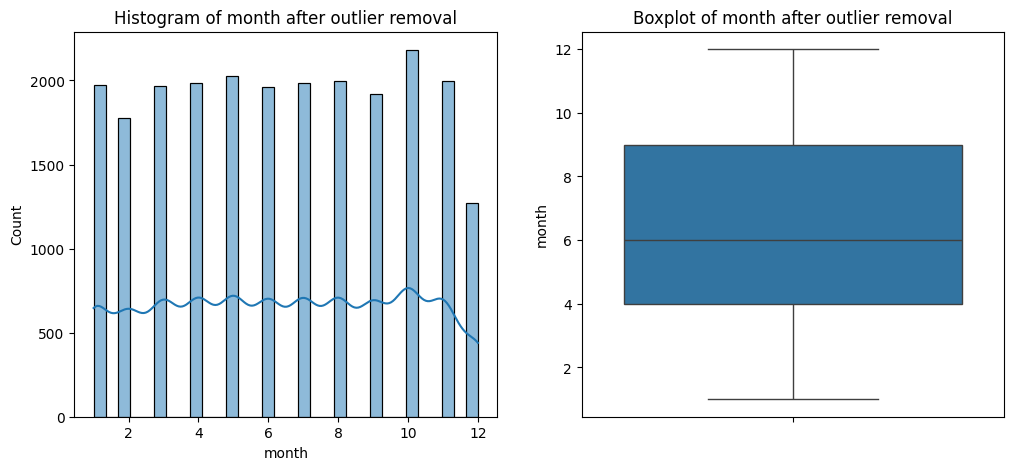

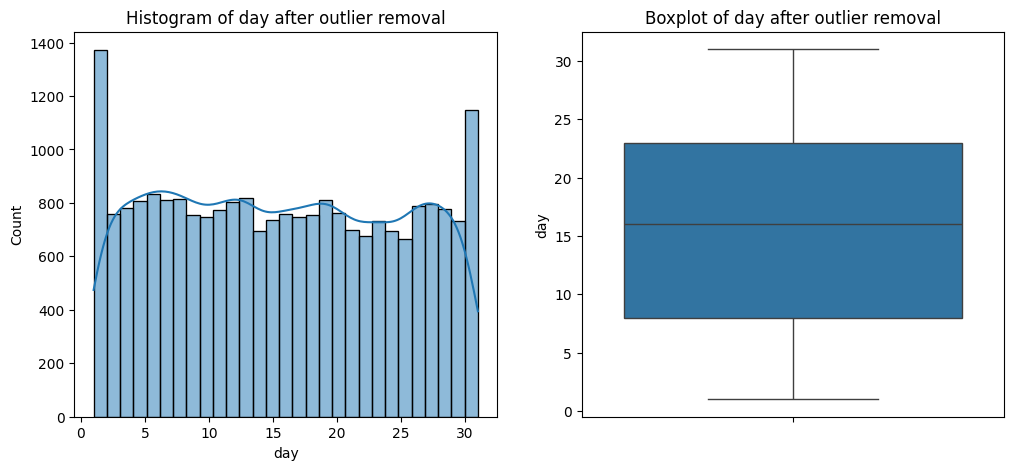

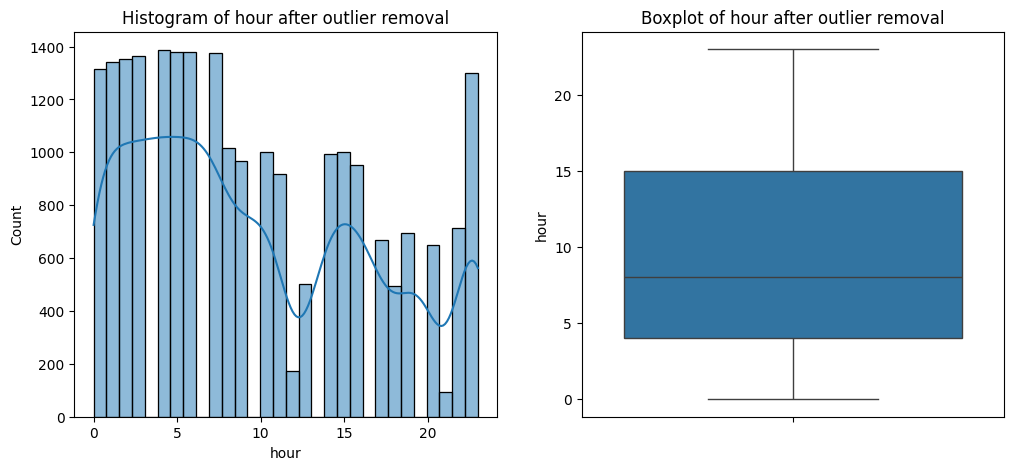

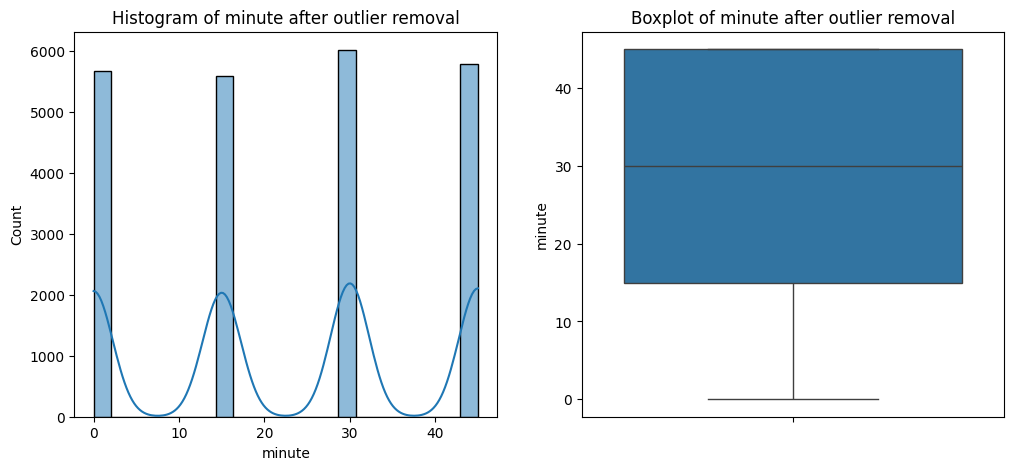

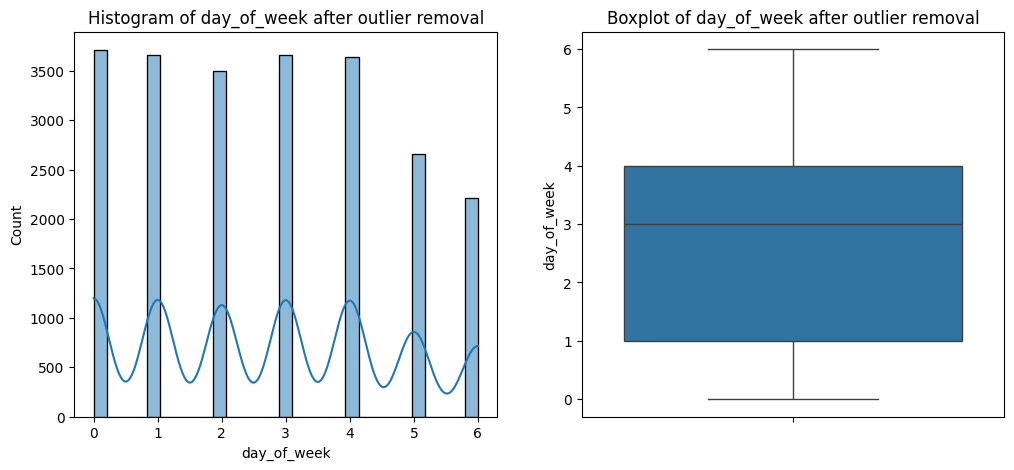

In [ ]:
# Visualize the cleaned data again to confirm outliers are removed
for column in data:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

Outliers checking  

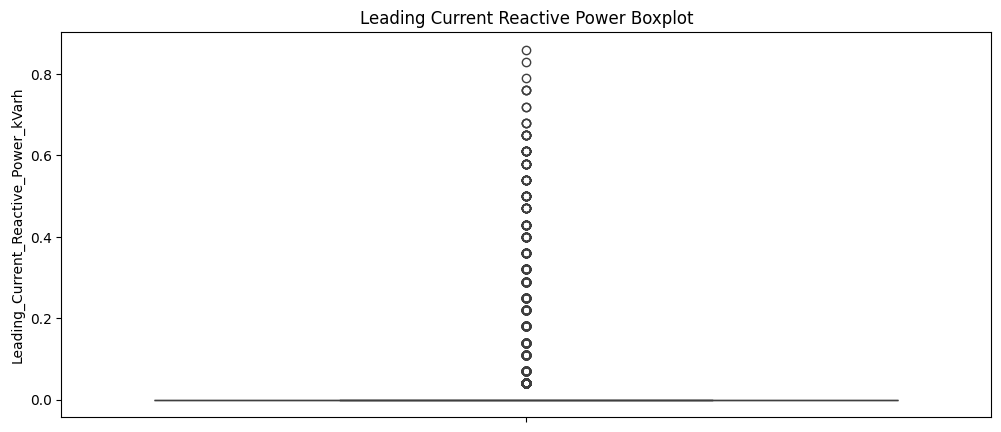

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 5))

sns.boxplot(cleaned_data["Leading_Current_Reactive_Power_kVarh"])
plt.title("Leading Current Reactive Power Boxplot")
plt.show()

Dectected Outliers in Leading current Reactive Power KVarh Column

In [ ]:
Q1 = cleaned_data["Leading_Current_Reactive_Power_kVarh"].quantile(0.25)
Q3 = cleaned_data["Leading_Current_Reactive_Power_kVarh"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_data = cleaned_data[
    (cleaned_data["Leading_Current_Reactive_Power_kVarh"] >= lower_bound) &
    (cleaned_data["Leading_Current_Reactive_Power_kVarh"] <= upper_bound)
]


In [ ]:
cleaned_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,1,1,0,15,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,1,1,0,30,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,2018,1,1,0,45,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,2018,1,1,1,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2018-12-31 07:00:00,3.74,3.02,0.0,0.0,77.80,100.0,25200,Weekday,Monday,Light_Load,2018,12,31,7,0,0
35033,2018-12-31 22:30:00,3.67,4.43,0.0,0.0,63.80,100.0,81000,Weekday,Monday,Light_Load,2018,12,31,22,30,0
35034,2018-12-31 22:45:00,3.82,4.54,0.0,0.0,64.38,100.0,81900,Weekday,Monday,Light_Load,2018,12,31,22,45,0
35035,2018-12-31 23:00:00,3.85,4.86,0.0,0.0,62.10,100.0,82800,Weekday,Monday,Light_Load,2018,12,31,23,0,0


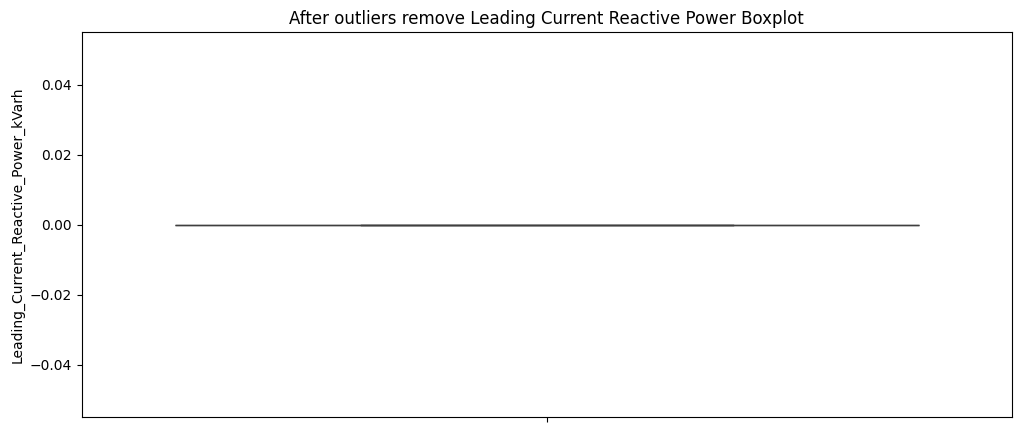

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 5))

sns.boxplot(cleaned_data["Leading_Current_Reactive_Power_kVarh"])
plt.title("After outliers remove Leading Current Reactive Power Boxplot")
plt.show()

In [ ]:
cleaned_data.select_dtypes("number").skew()

,0
Usage_kWh,0.825854
Lagging_Current_Reactive.Power_kVarh,0.874807
Leading_Current_Reactive_Power_kVarh,0.000000
CO2(tCO2),0.795370
Lagging_Current_Power_Factor,-0.082033
Leading_Current_Power_Factor,0.000000
NSM,0.497713
year,0.000000
month,-0.026632
day,0.055048


In [ ]:
import numpy as np

column = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for columns in numeric_columns:
    cleaned_data[column] =np.log1p(cleaned_data[column])


log transformation has significantly reduced skewness:

In [ ]:
cleaned_data.select_dtypes("number").skew()

,0
Usage_kWh,0.188382
Lagging_Current_Reactive.Power_kVarh,0.128748
Leading_Current_Reactive_Power_kVarh,0.000000
CO2(tCO2),0.651712
Lagging_Current_Power_Factor,-0.374236
Leading_Current_Power_Factor,0.000000
NSM,0.497713
year,0.000000
month,-0.026632
day,0.055048


** Now nearly normal**

Usage_kWh (0.188)

Lagging_Current_Reactive_Power_kVarh (0.128)

CO2(tCO2) (0.651) → still slightly skewed but much improved

Lagging_Current_Power_Factor (-0.374)

Completely normal

Leading_Current_Reactive_Power_kVarh, Leading_Current_Power_Factor, year, month, day, minute, day_of_week

In [ ]:
cleaned_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
0,2018-01-01 00:15:00,0.157512,0.156707,0.0,0.0,0.174192,0.174919,900,Weekday,Monday,Light_Load,2018,1,1,0,15,0
1,2018-01-01 00:30:00,0.159890,0.160896,0.0,0.0,0.173962,0.174919,1800,Weekday,Monday,Light_Load,2018,1,1,0,30,0
2,2018-01-01 00:45:00,0.157750,0.157882,0.0,0.0,0.174091,0.174919,2700,Weekday,Monday,Light_Load,2018,1,1,0,45,0
3,2018-01-01 01:00:00,0.157980,0.158740,0.0,0.0,0.174012,0.174919,3600,Weekday,Monday,Light_Load,2018,1,1,1,0,0
4,2018-01-01 01:15:00,0.159445,0.160976,0.0,0.0,0.173883,0.174919,4500,Weekday,Monday,Light_Load,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2018-12-31 07:00:00,0.159237,0.156974,0.0,0.0,0.174340,0.174919,25200,Weekday,Monday,Light_Load,2018,12,31,7,0,0
35033,2018-12-31 22:30:00,0.159048,0.160836,0.0,0.0,0.173846,0.174919,81000,Weekday,Monday,Light_Load,2018,12,31,22,30,0
35034,2018-12-31 22:45:00,0.159445,0.161054,0.0,0.0,0.173869,0.174919,81900,Weekday,Monday,Light_Load,2018,12,31,22,45,0
35035,2018-12-31 23:00:00,0.159522,0.161646,0.0,0.0,0.173776,0.174919,82800,Weekday,Monday,Light_Load,2018,12,31,23,0,0


identifing categorical features

In [ ]:
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_columns)

Categorical Features: Index(['WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object')


 Encoding Categorical Variables usnig  'Label encoder'



In [ ]:
print("\nbefore Encoding:")
print(cleaned_data[['WeekStatus', 'Day_of_week']].head())


before Encoding:
  WeekStatus Day_of_week
0    Weekday      Monday
1    Weekday      Monday
2    Weekday      Monday
3    Weekday      Monday
4    Weekday      Monday


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders
label_encoders = {}

# Categorical columns
categorical_columns = ['WeekStatus', 'Day_of_week']

# Apply label encoding
for column in categorical_columns:
    le = LabelEncoder()  # Create a new LabelEncoder for each column
    cleaned_data[column] = le.fit_transform(cleaned_data[column])
    label_encoders[column] = le  # Store the encoder for future inverse transformation


In [ ]:
print("\nAfter Encoding:")
print(cleaned_data[['WeekStatus', 'Day_of_week']].head())


After Encoding:
   WeekStatus  Day_of_week
0           0            1
1           0            1
2           0            1
3           0            1
4           0            1


In [ ]:
cleaned_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
0,2018-01-01 00:15:00,0.157512,0.156707,0.0,0.0,0.174192,0.174919,900,0,1,Light_Load,2018,1,1,0,15,0
1,2018-01-01 00:30:00,0.159890,0.160896,0.0,0.0,0.173962,0.174919,1800,0,1,Light_Load,2018,1,1,0,30,0
2,2018-01-01 00:45:00,0.157750,0.157882,0.0,0.0,0.174091,0.174919,2700,0,1,Light_Load,2018,1,1,0,45,0
3,2018-01-01 01:00:00,0.157980,0.158740,0.0,0.0,0.174012,0.174919,3600,0,1,Light_Load,2018,1,1,1,0,0
4,2018-01-01 01:15:00,0.159445,0.160976,0.0,0.0,0.173883,0.174919,4500,0,1,Light_Load,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2018-12-31 07:00:00,0.159237,0.156974,0.0,0.0,0.174340,0.174919,25200,0,1,Light_Load,2018,12,31,7,0,0
35033,2018-12-31 22:30:00,0.159048,0.160836,0.0,0.0,0.173846,0.174919,81000,0,1,Light_Load,2018,12,31,22,30,0
35034,2018-12-31 22:45:00,0.159445,0.161054,0.0,0.0,0.173869,0.174919,81900,0,1,Light_Load,2018,12,31,22,45,0
35035,2018-12-31 23:00:00,0.159522,0.161646,0.0,0.0,0.173776,0.174919,82800,0,1,Light_Load,2018,12,31,23,0,0


In [ ]:
print("\nBefore Encoding:")
print(cleaned_data[['Load_Type']].head())


Before Encoding:
    Load_Type
0  Light_Load
1  Light_Load
2  Light_Load
3  Light_Load
4  Light_Load


In [ ]:
#encode Load_Type

cleaned_data['Load_Type'] = le.fit_transform(cleaned_data['Load_Type'])

In [ ]:
print("\nAfter Encoding:")
print(cleaned_data[['Load_Type']].head())


After Encoding:
   Load_Type
0          0
1          0
2          0
3          0
4          0


In [ ]:
cleaned_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
0,2018-01-01 00:15:00,0.157512,0.156707,0.0,0.0,0.174192,0.174919,900,0,1,0,2018,1,1,0,15,0
1,2018-01-01 00:30:00,0.159890,0.160896,0.0,0.0,0.173962,0.174919,1800,0,1,0,2018,1,1,0,30,0
2,2018-01-01 00:45:00,0.157750,0.157882,0.0,0.0,0.174091,0.174919,2700,0,1,0,2018,1,1,0,45,0
3,2018-01-01 01:00:00,0.157980,0.158740,0.0,0.0,0.174012,0.174919,3600,0,1,0,2018,1,1,1,0,0
4,2018-01-01 01:15:00,0.159445,0.160976,0.0,0.0,0.173883,0.174919,4500,0,1,0,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2018-12-31 07:00:00,0.159237,0.156974,0.0,0.0,0.174340,0.174919,25200,0,1,0,2018,12,31,7,0,0
35033,2018-12-31 22:30:00,0.159048,0.160836,0.0,0.0,0.173846,0.174919,81000,0,1,0,2018,12,31,22,30,0
35034,2018-12-31 22:45:00,0.159445,0.161054,0.0,0.0,0.173869,0.174919,81900,0,1,0,2018,12,31,22,45,0
35035,2018-12-31 23:00:00,0.159522,0.161646,0.0,0.0,0.173776,0.174919,82800,0,1,0,2018,12,31,23,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define Features (x) and (y)
X = cleaned_data.drop(columns=['Usage_kWh', 'date']) #Replace with actual target column
Y = cleaned_data['Usage_kWh']

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values using SimpleImputer
# Strategy can be 'mean', 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(strategy='mean')  # Replace with your preferred strategy
X_imputed = imputer.fit_transform(X)

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
X_selector = selector.fit_transform(X_imputed, Y)


In [ ]:
# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Load_Type', 'hour'],
      dtype='object')


In [ ]:
cleaned_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
0,2018-01-01 00:15:00,0.157512,0.156707,0.0,0.0,0.174192,0.174919,900,0,1,0,2018,1,1,0,15,0
1,2018-01-01 00:30:00,0.159890,0.160896,0.0,0.0,0.173962,0.174919,1800,0,1,0,2018,1,1,0,30,0
2,2018-01-01 00:45:00,0.157750,0.157882,0.0,0.0,0.174091,0.174919,2700,0,1,0,2018,1,1,0,45,0
3,2018-01-01 01:00:00,0.157980,0.158740,0.0,0.0,0.174012,0.174919,3600,0,1,0,2018,1,1,1,0,0
4,2018-01-01 01:15:00,0.159445,0.160976,0.0,0.0,0.173883,0.174919,4500,0,1,0,2018,1,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2018-12-31 07:00:00,0.159237,0.156974,0.0,0.0,0.174340,0.174919,25200,0,1,0,2018,12,31,7,0,0
35033,2018-12-31 22:30:00,0.159048,0.160836,0.0,0.0,0.173846,0.174919,81000,0,1,0,2018,12,31,22,30,0
35034,2018-12-31 22:45:00,0.159445,0.161054,0.0,0.0,0.173869,0.174919,81900,0,1,0,2018,12,31,22,45,0
35035,2018-12-31 23:00:00,0.159522,0.161646,0.0,0.0,0.173776,0.174919,82800,0,1,0,2018,12,31,23,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandF = RandomForestRegressor(n_estimators=100, random_state=42)
RandF.fit(X_selector, Y)

RandomForestRegressor(random_state=42)

In [ ]:
important_feature = pd.Series(RandF.feature_importances_, index=X.columns[selector.get_support()])
important_feature = important_feature.sort_values(ascending=False)

print("\nPrint Important Features:")
print(important_feature)


Print Important Features:
CO2(tCO2)                               0.955792
Lagging_Current_Power_Factor            0.024580
Lagging_Current_Reactive.Power_kVarh    0.019531
hour                                    0.000053
Load_Type                               0.000044
dtype: float64


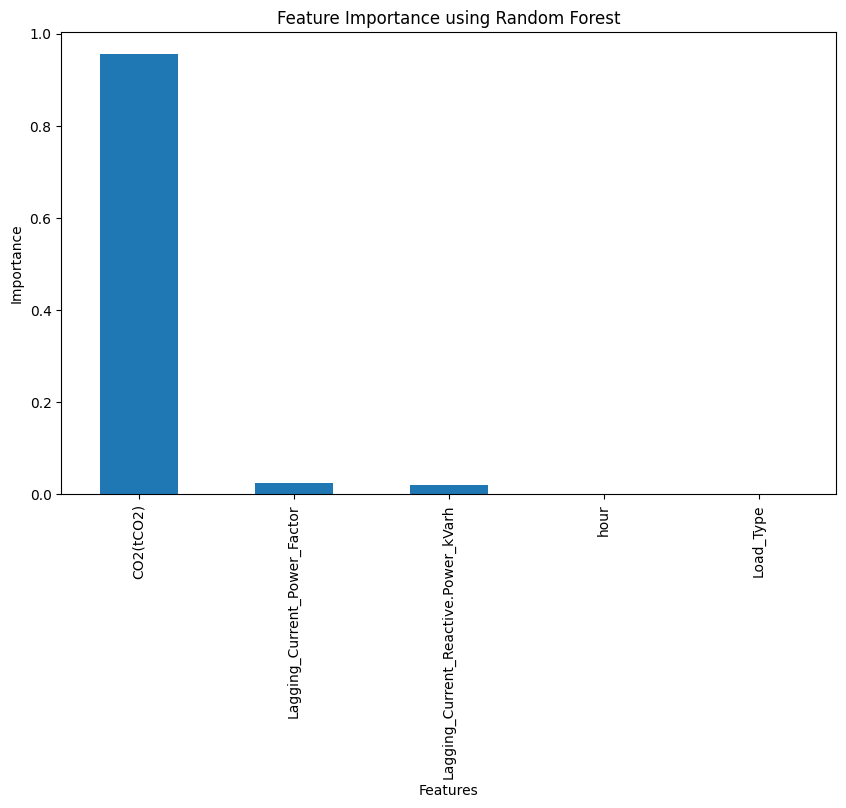

In [ ]:
# Plot feature importances
plt.figure(figsize=(10,6))
important_feature.plot(kind='bar')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
#Splitting Data into Training & Testing Sets

from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
x = cleaned_data.drop(columns=['Usage_kWh']) #Replace with actual target column
y = cleaned_data['Usage_kWh']

In [ ]:
# Split Data (80% Train, 20% Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
# Fill missing values before scaling (Example: using median)
X_train = x_train.select_dtypes(include=np.number)
X_test = x_test.select_dtypes(include=np.number)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# initial step of standardSCaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # X is your feature matrix


In [ ]:
#Convert back to DataFrame

x_scaler = pd.DataFrame(X_scaled, columns=X_train.columns, index=x_train.index) # Changed X_scaler to x_scaler

X_test_scaler = pd.DataFrame(X_test, columns=x_test.select_dtypes(include=np.number).columns, index=x_test.index) # Changed X_test_scaler to x_test_scaler

x_scaler # Changed X_scaler to x_scaler

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute,day_of_week
30172,-0.859069,0.0,-0.809823,-0.994369,0.0,-0.363428,1.907392,-0.011216,-0.755054,0.0,1.365607,-0.523717,-0.345836,-0.464199,1.704915
17474,-0.986267,0.0,-0.809823,-0.742246,0.0,-1.300398,-0.524276,-0.974448,-0.755054,0.0,0.172039,-1.548490,-1.357849,1.333933,-1.430925
9800,-0.859069,0.0,-0.809823,-0.454587,0.0,-1.084174,-0.524276,-1.456065,-0.755054,0.0,-0.723136,-0.295989,-1.068702,-0.464199,0.659635
12929,1.357966,0.0,1.666453,1.058141,0.0,0.969953,-0.524276,0.952017,0.523969,0.0,-0.424744,-0.068262,0.955324,0.434867,-0.908285
28716,-0.383421,0.0,-0.809823,-1.675998,0.0,-0.940025,1.907392,-0.492832,-0.755054,0.0,1.067215,1.298102,-0.924129,-0.464199,1.182275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18426,-0.986267,0.0,-0.809823,-0.231058,0.0,1.870886,-0.524276,1.433634,1.802992,0.0,0.172039,-0.523717,1.822764,1.333933,-0.385645
33063,0.903738,0.0,1.147478,1.117478,0.0,0.032983,-0.524276,0.952017,1.802992,0.0,1.663998,-0.523717,0.087884,-1.363265,-0.908285
8492,1.429144,0.0,1.147478,0.539155,0.0,0.213169,-0.524276,-1.456065,0.523969,0.0,-1.021528,1.639694,0.232457,-0.464199,0.659635
1452,-0.374213,0.0,-0.809823,-0.522410,0.0,-0.940025,-0.524276,0.952017,-0.755054,0.0,-1.618311,0.045602,-0.924129,-0.464199,-0.908285


Regressions

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

**Import Libraries**

In [ ]:
#Define models

Models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'Neural Network' : MLPRegressor(max_iter=1000, random_state=42)
}


In [ ]:
# Store model results
model_results = []

In [ ]:
# Train and evaluate each model
for name, model in Models.items():

    model.fit(x_scaler, y_train)
    y_pred = model.predict(X_test_scaler)

    # calculate evaluate matrix
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    # Assign the result to a variable named 'r2' instead of 'r2_score'
    r2 = r2_score(y_test, y_pred)

    # calculate r2 for y_train
    y_train_pred = model.predict(x_scaler)
    y_train_r2 = r2_score(y_train, y_train_pred)

    # Store the results (optional)
    model_results.append({
        'Model':name,
        'MSE':round(mse,4),
        'MAE':round(mae,4),
        'RMSE':round(rmse,4),
        'R2_Score(Test)': round(r2,4),
        'R2_Score(Train)' : round(y_train_r2,4)})

In [ ]:
# Show result as a DataFrame
model_results_df = pd.DataFrame(model_results)
model_results_df = model_results_df.sort_values(by=['R2_Score(Test)'], ascending= False)
model_results_df

,Model,MSE,MAE,RMSE,R2_Score(Test),R2_Score(Train)
1,Random Forest,0.0000,0.0000,0.0001,0.9999,1.0000
2,Gradient Boosting,0.0000,0.0002,0.0003,0.9988,0.9988
0,Linear Regression,0.0000,0.0004,0.0006,0.9933,0.9938
4,AdaBoost Regressor,0.0000,0.0007,0.0009,0.9883,0.9884
3,Support Vector Machine,0.0001,0.0077,0.0079,-0.0000,-0.0003
5,Neural Network,0.0003,0.0132,0.0170,-3.6269,-3.1709


Random Forest Regressor using cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, x_scaler, y_train, cv=5, scoring='r2')


print("Cross-Validation R2 Scores:", scores)
print("Average R2 Score:", scores.mean())

Cross-Validation R2 Scores: [0.99981518 0.99988116 0.99965022 0.99988086 0.99987027]
Average R2 Score: 0.9998195364204104


# Hypertunning the Models

 **RandomForestRegressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

RF = RandomForestRegressor()
RF_params = {'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' :[2, 5, 10],
    'max_features' : ['sqrt', 'log2'],
    'min_samples_leaf' :[1,2,4] }

# Perform GridSearchCV
RF_grid = GridSearchCV(estimator=RF, param_grid=RF_params,cv=5)
RF_grid.fit(x_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_RF = RF_grid.best_estimator_
best_RFparams = RF_grid.best_params_

# Predict on the test set
y_pred = RF_grid.predict(X_test_scaler)
y_train_predi = RF_grid.predict(x_scaler)


# Calculate R-squared
RF_r2 = r2_score(y_test, y_pred)
RF_r2_train = r2_score(y_train, y_train_predi)

# Print results
print(f"Best Random Forest Regression Model: {Best_RF}")
print(f"Best Parameters: {best_RFparams}")
print(f"R2_Score on Test Set: {RF_r2:.4f}\n")
print(f"R2_Score on Train Set: {RF_r2_train:.4f}")

Best Random Forest Regression Model: RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=200)
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2_Score on Test Set: 0.9979

R2_Score on Train Set: 0.9997


In [ ]:
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE : 0.00023463859901478443
MSE : 1.3217434617178076e-07
RMSE : 0.00036355789933899214


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import  GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB_params = {
    'n_estimators' :[50, 100, 200],
    'learning_rate' :[0.1, 0.01, 0.001], # Changed 'Learning_rate' to 'learning_rate'
    'max_depth' : [3,4,5],
}

# Perform GridSearchCV
GB_grid = GridSearchCV(estimator=GB, param_grid=GB_params,cv=5)
GB_grid.fit(x_scaler, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_GB = GB_grid.best_estimator_
best_GB_params = GB_grid.best_params_

# Predict on the test set
y_pred = GB_grid.predict(X_test_scaler)
y_train_predi = GB_grid.predict(x_scaler)


# Calculate R-squared
GB_r2 = r2_score(y_test, y_pred)
GB_r2_train = r2_score(y_train, y_train_predi)

# Print results
print(f"Best GradientBoosting Model: {Best_GB}")
print(f"Best Params: {best_GB_params}")
print(f"R2_Score on Test Set: {GB_r2:.4f}\n")
print(f"R2_Score on Train Set: {GB_r2_train:.4f}")

Best GradientBoosting Model: GradientBoostingRegressor(max_depth=5, n_estimators=200)
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
R2_Score on Test Set: 0.9999

R2_Score on Train Set: 0.9999


In [ ]:
print(f"MAE  : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")

MAE  : 6.506965683386091e-05
MSE : 9.282491677485983e-09
RMSE : 9.634568842188001e-05


**SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



SVR = SVR()
SVR_params = {
    'kernel' : ['linear', 'rbf'],
    'C':[0.1,1,10,100],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
SVR_grid = GridSearchCV(estimator=SVR, param_grid=SVR_params,cv=5)
SVR_grid.fit(x_scaler, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_SVR = SVR_grid.best_estimator_
best_SVR_params = SVR_grid.best_params_

# Predict on the test set
y_pred = SVR_grid.predict(X_test_scaler)
y_train_predi = SVR_grid.predict(x_scaler)


# Calculate R-squared
SVR_r2 = r2_score(y_test, y_pred)
SVR_r2_train = r2_score(y_train, y_train_predi)

# Print results
print(f"Best SVR: {Best_SVR}")
print(f"Best Parameters: {best_SVR_params}")
print(f"R2_Score on Test Set: {SVR_r2:.4f}\n")
print(f"R2_Score on Train Set: {SVR_r2_train:.4f}")

Best SVR: SVR(C=0.1, epsilon=0.01, kernel='linear')
Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
R2_Score on Test Set: -0.0000

R2_Score on Train Set: -0.0003


In [ ]:
print(f"MAE  : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")

MAE  : 0.007657952551790502
MSE : 6.247475291768601e-05
RMSE : 0.007904097223445953


 **Neural Network (MLP Regressor)**

In [ ]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor()

MLP_params = {
    'hidden_layer_sizes' : [(50,),(100,)],
    'activation' : ['relu', 'tanh'],
    'alpha' : [0.0001, 0.001],
    'learning_rate' : ['constant', 'adaptive']
}

#Apply Gridsearchcv
MLP_grid = GridSearchCV(estimator=MLP, param_grid=MLP_params, cv=5)
MLP_grid.fit(x_scaler, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate': ['constant', 'adaptive']})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_MLP = MLP_grid.best_estimator_
best_MLP_params = MLP_grid.best_params_

# Predict on the test set
y_pred = MLP_grid.predict(X_test_scaler)
y_train_predi = MLP_grid.predict(x_scaler)


# Calculate R-squared
MLP_r2 = r2_score(y_test, y_pred)
MLP_r2_train = r2_score(y_train, y_train_predi)

# Print results
print(f"Best SVR: {Best_MLP}")
print(f"Best Parameters: {best_MLP_params}")
print(f"R2_Score on Test Set: {MLP_r2:.4f}\n")
print(f"R2_Score on Train Set: {MLP_r2_train:.4f}")

Best SVR: MLPRegressor(activation='tanh', alpha=0.001, learning_rate='adaptive')
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
R2_Score on Test Set: -2.1519

R2_Score on Train Set: -2.0206


In [ ]:
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE : 0.01035579853755953
MSE : 0.00019691524172549743
RMSE : 0.01403264913426889


**Linear Regression**

***Lasso Regressor***

In [ ]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso_params= {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]
}

#Apply Gridsearchcv
Lasso_grid = GridSearchCV(estimator=Lasso, param_grid=Lasso_params, cv=5)
Lasso_grid.fit(x_scaler, y_train)



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_Lasso = Lasso_grid.best_estimator_
best_Lasso_params = Lasso_grid.best_params_

# Predict on the test set
y_pred = Lasso_grid.predict(X_test_scaler)
y_train_predi = Lasso_grid.predict(x_scaler)

# Calculate R-squared
Lasso_r2 = r2_score(y_test, y_pred)
Lasso_r2_train = r2_score(y_train, y_train_predi)


print("Best Lasso Params:", Lasso_grid.best_params_)
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2_Score on Test set: {Lasso_r2:.4f}")
print(f"R2_Score on Train set : {Lasso_r2_train:.4f}")

Best Lasso Params: {'alpha': 0.001}
MAE : 0.0011356073721641572
MSE : 1.6549620061914359e-06
RMSE: 0.0012864532662290673
R2_Score on Test set: 0.9735
R2_Score on Train set : 0.9742


***Ridge Rergressor***

In [ ]:
from sklearn.linear_model import Lasso, Ridge

Ridge = Ridge()
Ridge_params= {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]
}

#Apply Gridsearchcv
Ridge_grid = GridSearchCV(estimator=Ridge, param_grid=Ridge_params, cv=5)
Ridge_grid.fit(x_scaler, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# Get the best model, best parameters, and accuracy
Best_Ridge = Ridge_grid.best_estimator_
best_Ridge_params = Ridge_grid.best_params_

# Predict on the test set
y_pred = Ridge_grid.predict(X_test_scaler)
y_train_predi =Ridge_grid.predict(x_scaler)

# Calculate R-squared
Ridge_r2 = r2_score(y_test, y_pred)
Ridge_r2_train = r2_score(y_train, y_train_predi)


print("Best Ridge Params:", Ridge_grid.best_params_)
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2_Score on Test set: {Ridge_r2:.4f}")
print(f"R2_Score on Train set : {Ridge_r2_train:.4f}")

Best Ridge Params: {'alpha': 0.1}
MAE : 0.0004319111843459644
MSE : 4.159158407130919e-07
RMSE: 0.0006449153748462599
R2_Score on Test set: 0.9933
R2_Score on Train set : 0.9938


Comparison Table

In [ ]:
results = []

models = {
    'Random Forest' : Best_RF,
    'Gradient Boosting' : Best_GB,
    'SVR' : Best_SVR,
    'Neural Network' : Best_MLP,
    'Lasso' : Best_Lasso,
    'Ridge' : Best_Ridge

}

for name, models in models.items():
    y_pred = models.predict(X_test_scaler)
    y_train_predi = models.predict(x_scaler)

    train_r2 = r2_score(y_train, y_train_predi)
    test_r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)


    results.append({
        'Model' :name,
        'MAE' : mae,
        'MSE' :mse,
        'RMSE': rmse,
        "R2_Score(Test)": test_r2,
        "R2_Score(Train)" : train_r2
    })



In [ ]:
# Convert results to DataFrame
comparison_data = pd.DataFrame(results)
comparison_data = comparison_data.sort_values(by='R2_Score(Test)', ascending=False)
comparison_data

,Model,MAE,MSE,RMSE,R2_Score(Test),R2_Score(Train)
1,Gradient Boosting,0.000065,9.282492e-09,0.000096,0.999851,0.999903
0,Random Forest,0.000235,1.321743e-07,0.000364,0.997884,0.999718
5,Ridge,0.000432,4.159158e-07,0.000645,0.993343,0.993830
4,Lasso,0.001136,1.654962e-06,0.001286,0.973510,0.974220
2,SVR,0.007658,6.247475e-05,0.007904,-0.000002,-0.000319
3,Neural Network,0.010356,1.969152e-04,0.014033,-2.151925,-2.020553


Best Performing Model: Gradient Boosting Regressor

R² Test: 0.99985


Gradient Boosting Regressor outperformed all other models with the lowest error metrics and highest R² scores on both training and test data, indicating excellent generalization.



**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error
import numpy as np
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([

    ('scaler' , StandardScaler()),
    ('model', GradientBoostingRegressor(max_depth=5, n_estimators=200))
])


x_train_numeric = x_train.select_dtypes(include=np.number)
x_test_numeric = x_test.select_dtypes(include=np.number)
# train the pipeline
pipeline.fit(x_train_numeric, y_train)

# predict
y_pred = pipeline.predict(x_test_numeric)

In [ ]:
# Define the parameter grid with the correct prefix 'model__'
hyperparameter_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 4, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Apply GridSearchcv
grid_searh = GridSearchCV(estimator=pipeline, param_grid=hyperparameter_grid, cv=5)
grid_searh.fit(x_train_numeric, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(max_depth=5,
                                                                  n_estimators=200))]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.001],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [50, 100, 200]})

Now pipeline working on Gradient Boosting Reressor model, which is hyper tunning was already perfommed  

In [ ]:
# Best pipeline
best_pipeline = grid_searh.best_estimator_


R2= r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"MAE : {MAE}")
print(f"MSE :{MSE}")
print(f"RMSE : {RMSE}")
print(f"R2_Score : {R2}")

MAE : 6.505301281813169e-05
MSE :9.272203242183346e-09
RMSE : 9.629228028343366e-05
R2_Score : 0.9998515844351864


**Saving pipeline**

In [ ]:
import joblib

# saving the pipeline
joblib.dump(best_pipeline, 'pipeline.joblib')
print("Pipeline Saved Successfully")

Pipeline Saved Successfully


**Test unseen data**

In [ ]:
# Load the saved pipeline
load_pipe = joblib.load('pipeline.joblib')


# Load the test data
load_data = pd.read_csv('Unsaved_data.csv')
load_data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,12/1/2018 0:25,2.25,2.65,0.17,0,62.31,98.01,900,0,1,0
1,10/1/2018 0:30,3.00,3.70,0.08,0,67.79,88.00,1800,0,1,0
2,15/1/2018 12:45:00 AM,4.24,3.45,0.44,0,71.28,100.00,2700,0,1,0
3,16/1/2018 1:00:00 AM,5.31,4.46,16.88,0,67.22,100.00,3600,0,1,0
4,17/1/2018 1:15:00 AM,3.85,4.52,2.55,0,65.51,100.00,4500,0,1,0
5,18/1/2018 1:30:00 AM,3.68,3.56,0.72,0,69.12,100.00,5400,0,1,0
6,1/1/2018 1:45,3.80,5.12,0.50,0,62.91,100.00,6300,0,1,0
7,1/1/2018 2:00,3.68,4.78,0.70,0,67.47,100.00,7200,0,1,0
8,1/1/2018 2:15,4.48,4.74,0.00,0,66.94,100.00,8100,0,1,0
9,1/1/2018 2:30,4.78,4.80,0.00,0,62.91,100.00,9000,0,1,0


In [ ]:
# Get the feature names used during training
training_features = load_pipe.named_steps['scaler'].feature_names_in_


# Check if all training features are present in the loaded data
missing_features = set(training_features) - set(load_data.columns)

# If any features are missing, handle them (e.g., add them with default values)
if missing_features:
    for feature in missing_features:
        load_data[feature] = 0  # Or any other suitable default value

# Now you can safely select the training features
load_data = load_data[training_features]

In [ ]:
prediction = load_pipe.predict(load_data)
print(prediction)

[0.17620959 0.17620959 0.17620959 0.17620959 0.17622909 0.17622909
 0.17622909 0.17622909 0.17622909 0.17622909]


 After bulding and tuning the **pipeline** with **GradientBoostingRegressor**, I test with Unseen data using the save pipeline (pipeline.joblib). Before prediction i ensured the new data mactched the training feature set by aligning columns and filling any missing ones with default values. This ensured consistency between testing and training phases. The pipeline then successfully made prediction new data.

# Conclusion:

This project focused on predicting electricity usage using variuos machine learning modules.This project demonstrate the machine learning workflow, from data processing to module building, hyperparameter tunning and develop pipelines.



*   Outliers were successfully handled using the **IQR** technique, improving model stability.
*   **Hyperparameter** tuning using GridSearchCV was critical in optimizing model performance.



# Future Work:


*   Explore Deep Learning techniques to potentially improve predctive accuracy
*   Automate the prediction process using trained pipeline, which allows for and consistent preprocessing and model inference on new unseen data
*   Consider adding more relevant features for improved predictive power.





